<a href="https://colab.research.google.com/github/DavidS-UNCC/ECGR_4105-Souto/blob/main/Homework_4_(David_Souto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 4**

Problem 1

In [212]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [213]:
# Load dataset (cancer dataset)
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

X, y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [214]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Storage arrays
accuracies = []
precisions = []
recalls = []
optimal_K = 0
best_accuracy = 0

In [215]:
# PCA and Model Training
# Iterate over # of principle components
for k in range(1, X_train.shape[1] + 1):  # for k: 1 --> # of features
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVM with kernel (you can change this to explore different kernels)
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_train_pca, y_train)

    # Evaluate the model
    y_pred = svm.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    # Store metrics for each K
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)

    # Track the optimal number of components for highest accuracy
    if acc > best_accuracy:
        best_accuracy = acc
        optimal_K = k

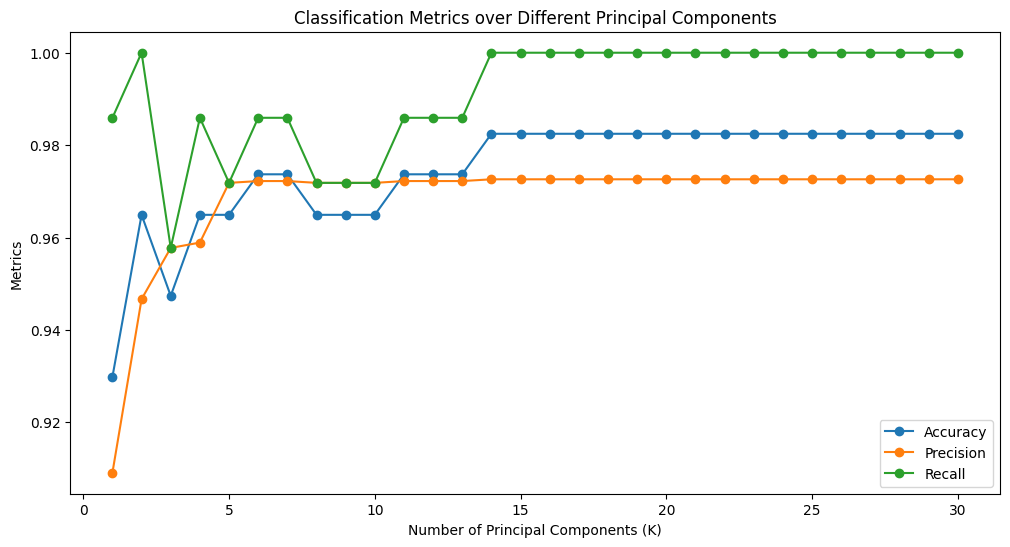

Optimal number of principal components (K): 14
Best accuracy: 0.9825


In [216]:
# Plotting Results (PCA Classification)
plt.figure(figsize=(12, 6))
plt.plot(range(1, X_train.shape[1] + 1), accuracies, label="Accuracy", marker='o')
plt.plot(range(1, X_train.shape[1] + 1), precisions, label="Precision", marker='o')
plt.plot(range(1, X_train.shape[1] + 1), recalls, label="Recall", marker='o')
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Metrics")
plt.title("Classification Metrics over Different Principal Components")
plt.legend()
plt.show()

print(f"Optimal number of principal components (K): {optimal_K}")
print(f"Best accuracy: {best_accuracy:.4f}")

Accuracy with linear kernel: 0.9912
Accuracy with poly kernel: 0.8684
Accuracy with rbf kernel: 0.9825
Accuracy with sigmoid kernel: 0.9561


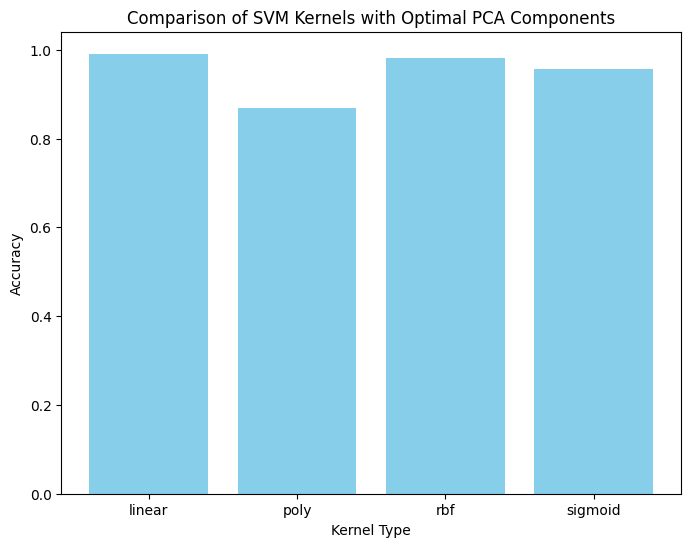

In [217]:
# Kernel Comparison for SVM with Optimal K Principal Components
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = []

# Use the optimal number of components
pca = PCA(n_components=optimal_K)
X_train_optimal_pca = pca.fit_transform(X_train)
X_test_optimal_pca = pca.transform(X_test)

for kernel in kernels:
    # Train SVM with different kernels
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_optimal_pca, y_train)

    # Evaluate the model
    y_pred = svm.predict(X_test_optimal_pca)
    acc = accuracy_score(y_test, y_pred)
    kernel_accuracies.append(acc)
    print(f"Accuracy with {kernel} kernel: {acc:.4f}")

# Plotting Kernel Comparison Results
plt.figure(figsize=(8, 6))
plt.bar(kernels, kernel_accuracies, color='skyblue')
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.title("Comparison of SVM Kernels with Optimal PCA Components")
plt.show()

Problem 2

In [218]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [219]:
# Load data
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
housing_data = pd.read_csv(url)

# Preprocessing:
housing_data = pd.get_dummies(housing_data, drop_first=True)
X = housing_data.drop('price', axis=1)
y = housing_data['price']

display(X)
display(y)

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,2910,3,1,1,0,False,False,False,False,False,False,False,False


,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [220]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Variables to store results
kernel_results = {}
component_results = {}

In [221]:
# Define the number of PCA components to test
max_components = min(len(X_train[0]), 10)

# Loop through different kernel types and PCA component counts
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    kernel_accuracies = []
    for n_components in range(1, max_components + 1):
        # Apply PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVR model
        svr_model = SVR(kernel=kernel)
        svr_model.fit(X_train_pca, y_train)
        y_pred = svr_model.predict(X_test_pca)

        # Calculate accuracy metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        kernel_accuracies.append((n_components, r2))

    # Store results
    kernel_results[kernel] = kernel_accuracies

# Find optimum # K
optimal_pca_components = {}
for kernel, results in kernel_results.items():
    optimal_pca_components[kernel] = max(results, key=lambda x: x[1])

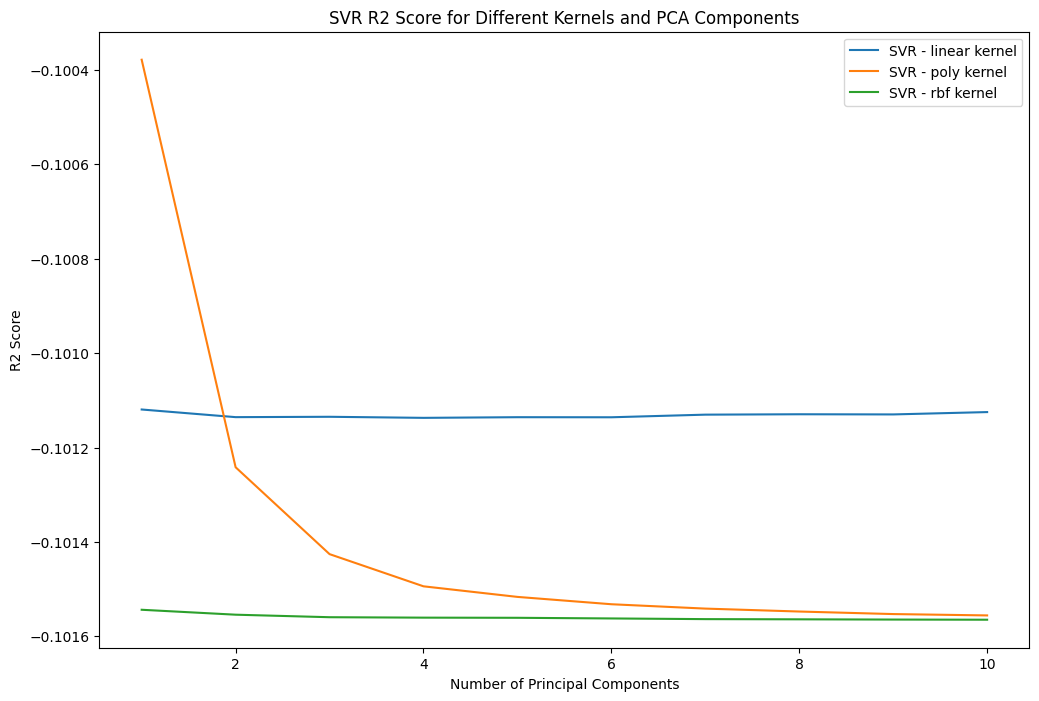

In [222]:
# Plot R2 Score for different kernel tricks
plt.figure(figsize=(12, 8))
for kernel, results in kernel_results.items():
    components, r2_scores = zip(*results)
    plt.plot(components, r2_scores, label=f'SVR - {kernel} kernel')

plt.xlabel("Number of Principal Components")
plt.ylabel("R2 Score")
plt.title("SVR R2 Score for Different Kernels and PCA Components")
plt.legend()
plt.show()

In [223]:
# Ridge regression for comparison
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Comparison: Ridge R2 Score
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge Regression R2 Score: {ridge_r2}")

# Output optimal number of PCA components per kernel
for kernel, (components, r2) in optimal_pca_components.items():
    print(f"Optimal PCA Components for {kernel} kernel: {components}, R2 Score: {r2}")

Ridge Regression R2 Score: 0.6528351861223265
Optimal PCA Components for linear kernel: 1, R2 Score: -0.10111944954954821
Optimal PCA Components for poly kernel: 1, R2 Score: -0.10037824780344096
Optimal PCA Components for rbf kernel: 1, R2 Score: -0.10154382541980977
